**IMPORT NECESSARY LIBRARIES**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [23]:
df = pd.read_csv("/home/jerome/Documents/CSV FILE/assign3.csv")

In [24]:
df

,Property Size (sq. ft.),Year Built,Number of Bedrooms,Location Score (1-10),Price (USD)
0,1763.475631,1926,5,4.188410,676625
1,3761.450472,1911,4,6.977815,1132096
2,1026.041183,1914,4,8.385389,732912
3,2998.403652,2022,4,7.080221,850696
4,4757.519580,1935,4,9.705372,1401764
...,...,...,...,...,...
813,1128.975695,2004,5,2.028572,409416
814,841.384976,1900,4,1.265536,351723
815,1567.520563,1907,3,4.361682,414313
816,3975.101462,1976,1,3.443923,840081


In [25]:
df.duplicated().sum()

np.int64(24)

In [26]:
data = df.dropna().drop_duplicates()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 0 to 817
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Property Size (sq. ft.)  794 non-null    float64
 1   Year Built               794 non-null    int64  
 2   Number of Bedrooms       794 non-null    int64  
 3   Location Score (1-10)    794 non-null    float64
 4   Price (USD)              794 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 37.2 KB


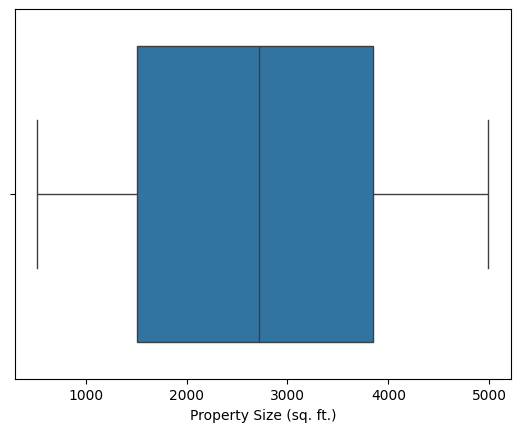

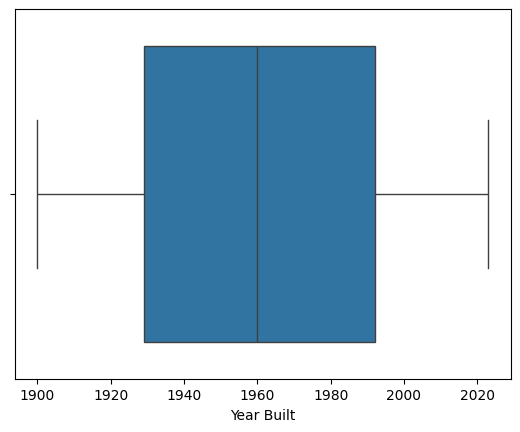

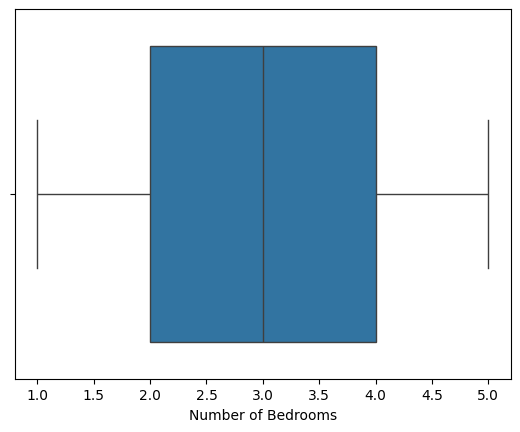

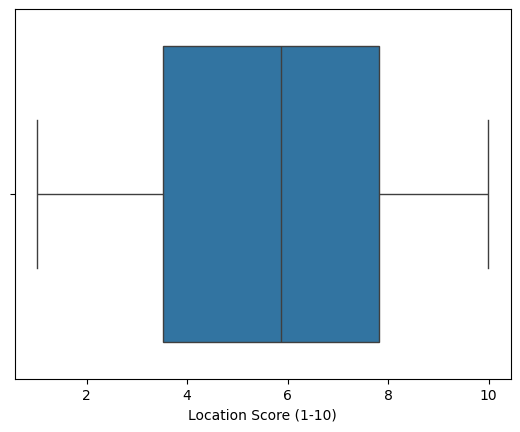

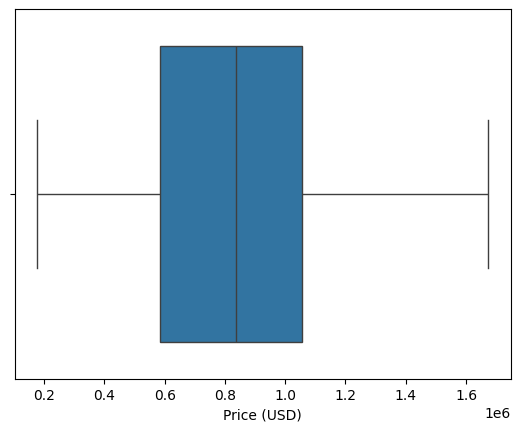

In [28]:
num = data.select_dtypes("number")
for x in num.columns:
    sns.boxplot(x= num[x])
    plt.show()

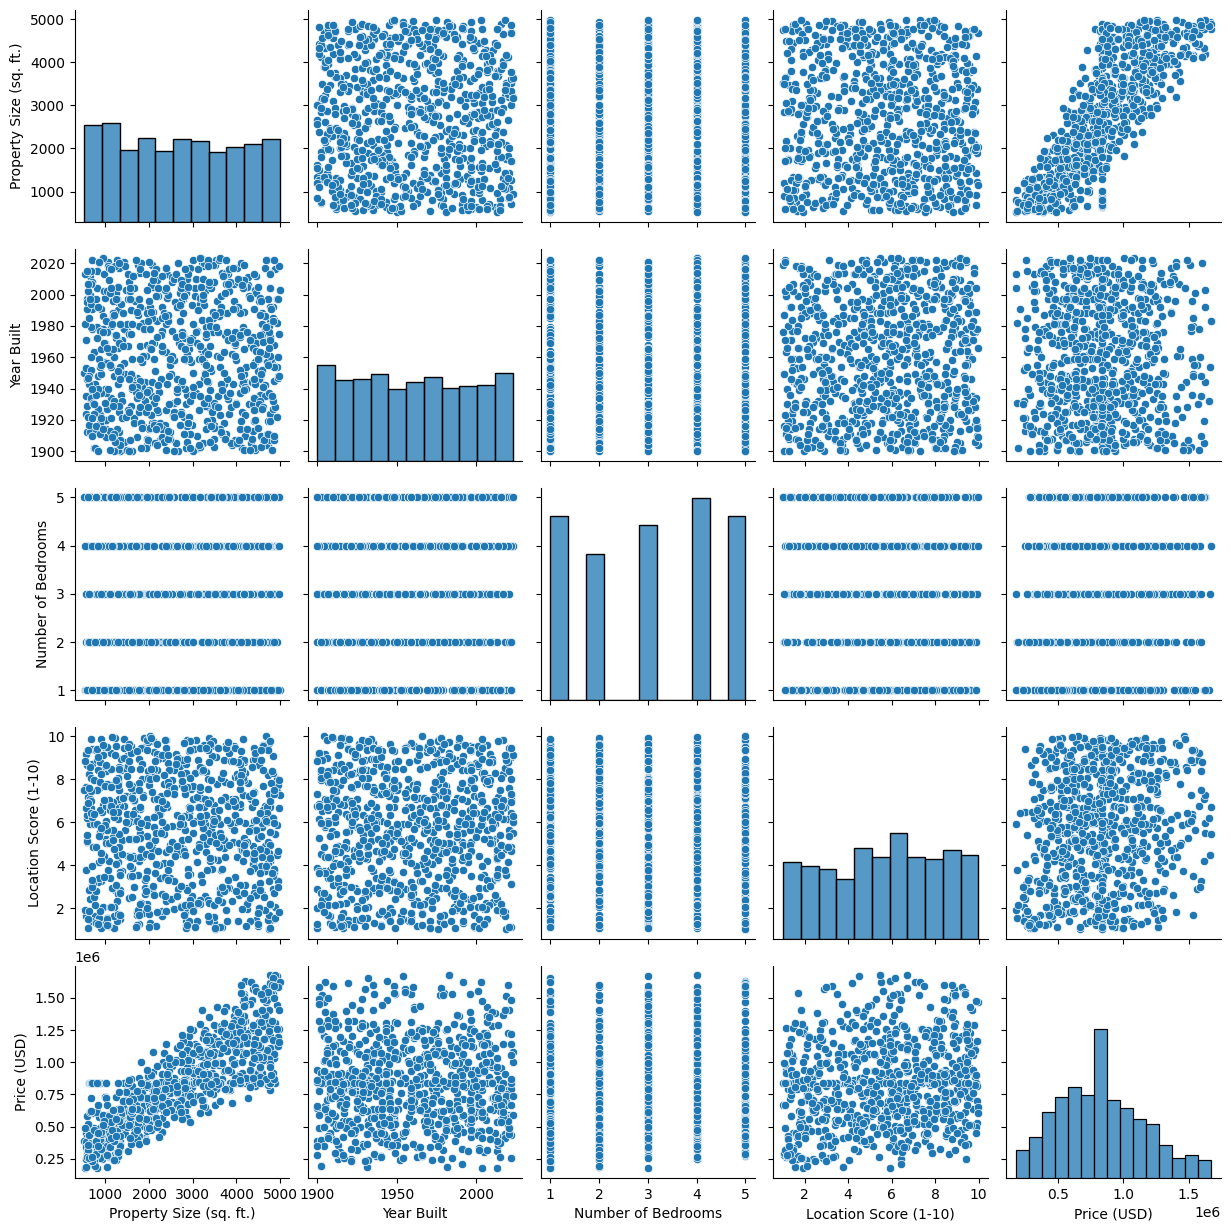

In [29]:
sns.pairplot(data)

In [30]:
data.isna().sum()

Property Size (sq. ft.)    0
Year Built                 0
Number of Bedrooms         0
Location Score (1-10)      0
Price (USD)                0
dtype: int64

In [31]:
corr = data.corr()
corr

,Property Size (sq. ft.),Year Built,Number of Bedrooms,Location Score (1-10),Price (USD)
Property Size (sq. ft.),1.000000,0.003019,0.024466,-0.035567,0.821199
Year Built,0.003019,1.000000,0.031373,0.023666,-0.006855
Number of Bedrooms,0.024466,0.031373,1.000000,0.000495,0.072768
Location Score (1-10),-0.035567,0.023666,0.000495,1.000000,0.170668
Price (USD),0.821199,-0.006855,0.072768,0.170668,1.000000


<Axes: >

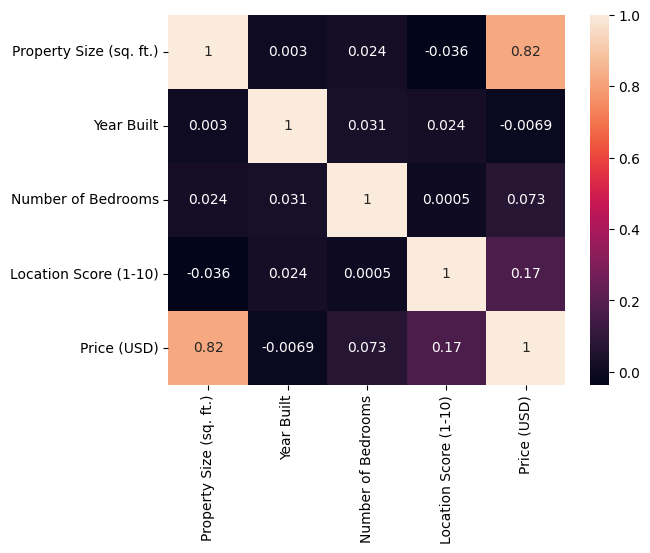

In [32]:
sns.heatmap(corr, annot=True)

In [33]:
y = data['Price (USD)']
X = data.drop(columns='Price (USD)')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [35]:
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

In [36]:
print(f'R2 score is :{r2:.2f}')
print(f'Mean Squared Error is: {mse:.2f}')

R2 score is :0.76
Mean Squared Error is: 23091478867.67


In [37]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error is: {rmse:.2f}")

Root Mean Squared Error is: 151958.81


In [38]:
max_price = y_test.max()
rmse_percent = (rmse / max_price) * 100
print(f'RMSE value is {rmse_percent:.2f}% of max y value')

RMSE value is 9.08% of max y value
